In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
auto_mpg = pd.read_csv(url, names=column_names, delim_whitespace=True, na_values='?')

auto_mpg.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [3]:
# Data cleaning
missing_data = auto_mpg.isnull().sum()
print("Missing values:\n", missing_data)

auto_mpg['horsepower'].fillna(auto_mpg['horsepower'].mean(), inplace=True)


Missing values:
 mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [8]:
# Estimate Skewness and Kurtosis
numerical_columns = auto_mpg.select_dtypes(include=[np.number]).columns

skewness = auto_mpg[numerical_columns].apply(lambda x: skew(x.dropna()))
kurt = auto_mpg[numerical_columns].apply(lambda x: kurtosis(x.dropna()))

print("Skewness:\n", skewness)
print("Kurtosis:\n", kurt)


Skewness:
 mpg             0.455342
cylinders       0.524934
displacement    0.716930
horsepower      1.091419
weight          0.529059
acceleration    0.277725
model year      0.011491
origin          0.920291
dtype: float64
Kurtosis:
 mpg            -0.519425
cylinders      -1.374466
displacement   -0.752288
horsepower      0.729039
weight         -0.790733
acceleration    0.399208
model year     -1.181482
origin         -0.822399
dtype: float64


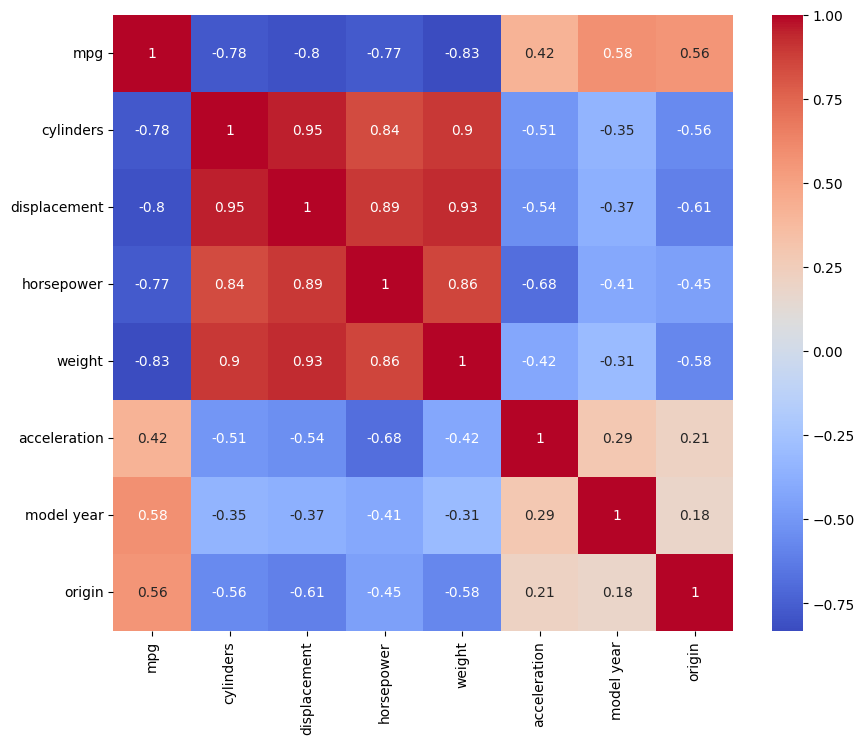

In [12]:
# Correlation Heat Map
plt.figure(figsize=(10, 8))
correlation_matrix = auto_mpg[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


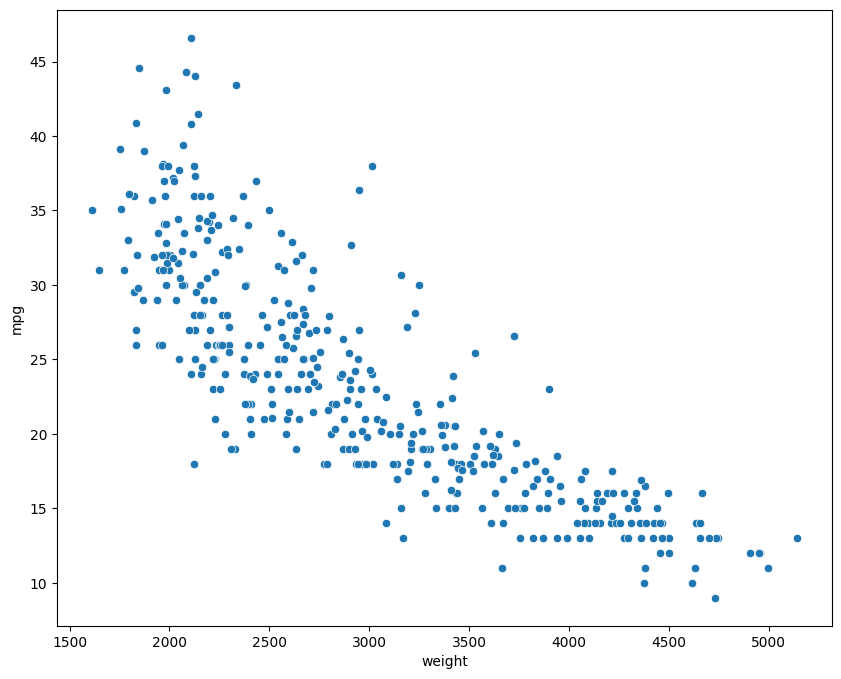

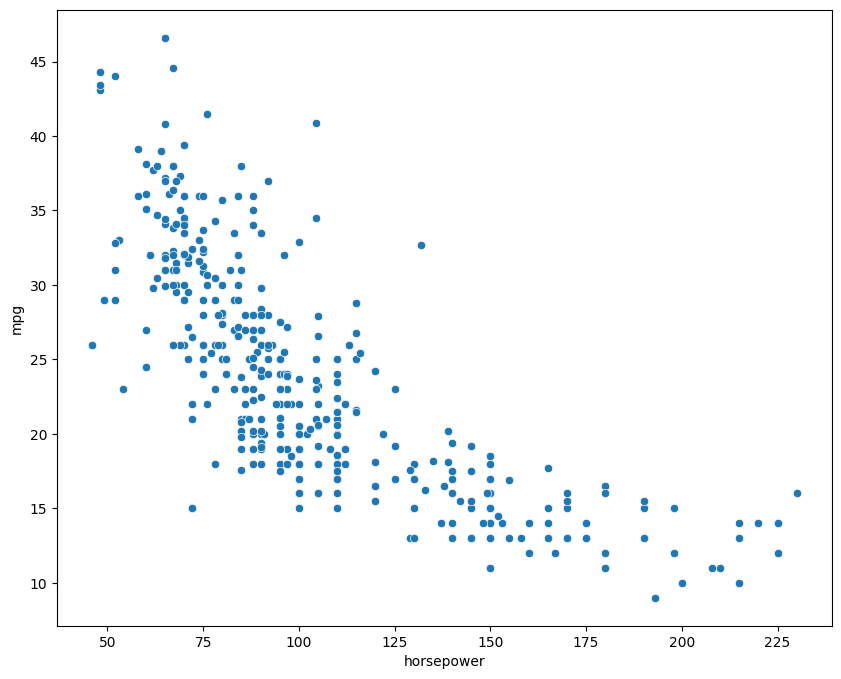

In [13]:
# Scatter plots
plt.figure(figsize=(10, 8))
sns.scatterplot(x='weight', y='mpg', data=auto_mpg)
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(x='horsepower', y='mpg', data=auto_mpg)
plt.show()


In [14]:
# Replace categorical with numerical
auto_mpg['origin'] = auto_mpg['origin'].replace({1: 'America', 2: 'Europe', 3: 'Asia'})
auto_mpg['origin'] = auto_mpg['origin'].map({'America': 1, 'Europe': 2, 'Asia': 3})

print(auto_mpg.head())


    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model year  origin                   car name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  
